Autor: Carlos Juarez
Fecha: 17 de octubre de 2024
Comentarios: programa para resolver la ecuaciòn de laplace a travès de diferencias finitas

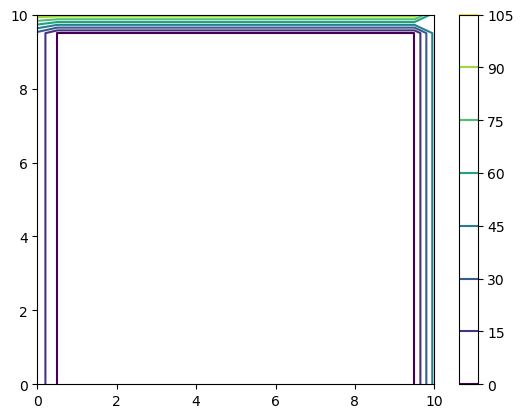

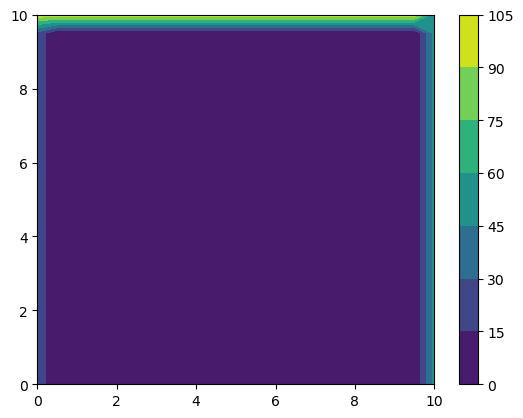

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la placa
Lx = 10
Ly = 10
h = 0.5

x = np.arange(0,Lx+h,h)
y = np.arange(0,Ly+h,h)

X,Y = np.meshgrid(x,y)
# plt.plot(X,Y,'*') # ploteo la grilla

T = np.zeros((len(y),len(x)))

# Condiciones de Frontera
# Condición de Dirichlet--> variable dependiente esta fija
T[0,:] = 0 # condicion de frontera en borde inferior
T[:,0] = 25 # condicion de frontera en borde izquierdo
T[-1,:] = 100 # condiciòn de frontera borde superior
T[:,-1] = 50

# gràfica en 2D/3D
plt.contour(X,Y,T)# lineas de contorno
plt.colorbar()
plt.figure()
plt.contourf(X,Y,T)
plt.colorbar()

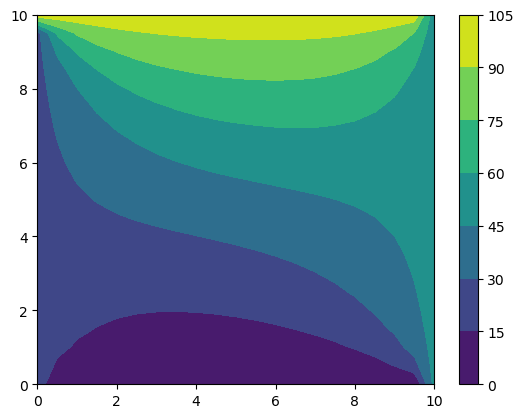

In [87]:
# soluciòn de puntos internos de la placa
Error = 1
while Error > 0.1:
    Tant = T.copy()
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            T[j][i] = (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4

    Error = np.max(abs(T - Tant))
    
plt.contourf(X,Y,T)
plt.colorbar()

In [88]:
print(T,'\n',Tant)

[[ 25.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
   50.        ]
 [ 25.          12.72520878   8.01221331   5.92009851   4.88389077
    4.34150448   4.06397932   3.94752134   3.94194117   4.0235569
    4.18437109   4.42824705   4.77113493   5.24518035   5.90897079
    6.87073653   8.34352754  10.78900651  15.33387162  25.1098096
   50.        ]
 [ 25.          17.89971091  13.42245085  10.81039837   9.30650173
    8.45621367   8.00945568   7.83010976   7.84482955   8.01703848
    8.33455986   8.80491916   9.45596315  10.34182048  11.55657549
   13.2616454   15.73949035  19.49718099  25.44833874  35.11001558
   50.        ]
 [ 25.          20.47011101  16.99905189  14.6357413   13.12906015
   12.22981211  11.75712213  11.5935911   11.66861619  11.94504208
   12.41120563  13.07771996  13.97846121  15.176

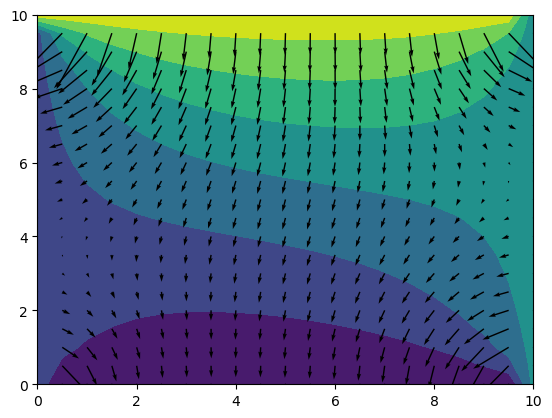

In [92]:
# calculo de flujos
dTdx = np.zeros((len(y),len(x)))
dTdy = np.zeros((len(y),len(x)))

# calculo de la derivadas
for i in range(1,len(x)-1):
    for j in range(1,len(y)-1):
        dTdx[j][i] = (T[j][i+1]-T[j][i-1])/2/h
        dTdy[j][i] = (T[j+1][i]-T[j-1][i])/2/h
k = 0.1
qx = -k*dTdx
qy = -k*dTdy
plt.contourf(X,Y,T)
plt.quiver(x,y,qx,qy)
